In [39]:
import pandas as pd
import numpy as np

In [40]:
data=pd.read_csv('SNA.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [42]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [43]:
data.groupby(['Gender'])['Age'].mean()

Gender
Female    38.411765
Male      36.867347
Name: Age, dtype: float64

In [21]:
data['Gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)

C:\Users\seasp\AppData\Local\Temp\ipykernel_23964\4111023445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)


In [44]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [54]:
model=LogisticRegression()

In [83]:
X=data[['Age','EstimatedSalary']]

In [86]:
Y=data['Purchased']

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [88]:
scaler=StandardScaler()

In [89]:
X_train=scaler.fit_transform(X_train)

In [90]:
X_test=scaler.transform(X_test)

In [91]:
model.fit(X_train,Y_train)

LogisticRegression()

In [92]:
predictions=model.predict(X_test)

In [93]:
import seaborn as sns

<Axes: >

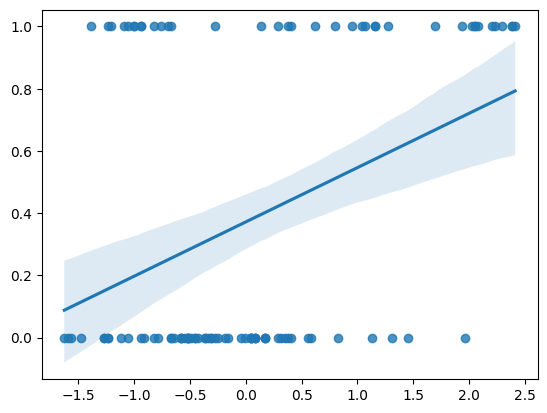

In [98]:
sns.regplot(x=X_test[:,1],y=predictions)

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
cm=confusion_matrix(Y_test,predictions)

In [109]:
print(cm)

[[57  6]
 [ 5 32]]


In [110]:
from sklearn.metrics import classification_report

In [111]:
rp=classification_report(Y_test,predictions)

In [112]:
print(rp)


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.84      0.86      0.85        37

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

